In [26]:
import pandas  as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.cluster import KMeans

In [27]:
archivo_csv = 'violencia_interfamiliar.csv'
df = pd.read_csv(archivo_csv)
df.head()


,fecha_de_apertura,dia_de_apertura,fecha_ocurrencia_hechos,dia_ocurrencia,hora_militar_ocurrencia_hechos,conforman_unidad_domestica,fisica,verbal,economica,psicologica,...,parentesco_frente_a_la_victima,no_de_hijos_agresor,edad_agresor,estado_civil_agresor,escolaridad_agresor,ocupacion_agresor,corregimiento_agresor,comuna_agresor,barrio,tipo_vivienda
0,2022-06-01T00:00:00.000,jueves,29/12/2021,miércoles,9:35 a.m.,si,si,si,no,si,...,ex-conyuge,1,23,soltero(a),bachiller completo,empleado,juanchito,comuna10,no,familiar
1,2022-07-01T00:00:00.000,viernes,2022-07-01T00:00:00.000,viernes,10:14 a.m.,si,si,si,no,si,...,ex-conyuge,1,30,soltero(a),bachiller completo,independiente,ninguno,comuna5,san pedro,alquilada
2,2022-11-01T00:00:00.000,martes,2022-06-01T00:00:00.000,miércoles,10:00 a.m.,si,si,si,no,si,...,hijo(a),2,23,casado(a),bachiller incompleto,independiente,ninguno,comuna1,no,alquilada
3,13/01/2022,jueves,13/01/2022,jueves,10:00 a.m.,si,no,si,no,si,...,ex-conyuge,1,37,soltero(a),bachiller completo,empleado,ninguno,comuna1,no,familiar
4,19/01/2022,miércoles,2022-12-01T00:00:00.000,miércoles,12:21 p.m.,si,si,si,no,si,...,ex-conyuge,1,30,soltero(a),bachiller completo,independiente,ninguno,comuna4,san cayetano,familiar


# Limpiar data set

In [28]:
# Lista de nombres de columnas que deben convertirse a tipo numérico
columnas_numericas = ['edad_victima', 'no_hijos_victima', 'numero_hermanos_victima', 'no_de_hijos_agresor', 'edad_agresor']

# Convertir las columnas a tipo numérico
df[columnas_numericas] = df[columnas_numericas].apply(pd.to_numeric, errors='coerce')

# Guardar el DataFrame modificado en un nuevo archivo CSV
df.to_csv('violencia_interfamiliar.csv', index=False)

# Cargar dataset limpio

In [29]:
archivo_csv = 'datos_modificados.csv'
df = pd.read_csv(archivo_csv)
df.head()

,fecha_de_apertura,dia_de_apertura,fecha_ocurrencia_hechos,dia_ocurrencia,hora_militar_ocurrencia_hechos,conforman_unidad_domestica,fisica,verbal,economica,psicologica,...,parentesco_frente_a_la_victima,no_de_hijos_agresor,edad_agresor,estado_civil_agresor,escolaridad_agresor,ocupacion_agresor,corregimiento_agresor,comuna_agresor,barrio,tipo_vivienda
0,2022-06-01T00:00:00.000,jueves,29/12/2021,miércoles,9:35 a.m.,si,si,si,no,si,...,ex-conyuge,1.0,23.0,soltero(a),bachiller completo,empleado,juanchito,comuna10,no,familiar
1,2022-07-01T00:00:00.000,viernes,2022-07-01T00:00:00.000,viernes,10:14 a.m.,si,si,si,no,si,...,ex-conyuge,1.0,30.0,soltero(a),bachiller completo,independiente,ninguno,comuna5,san pedro,alquilada
2,2022-11-01T00:00:00.000,martes,2022-06-01T00:00:00.000,miércoles,10:00 a.m.,si,si,si,no,si,...,hijo(a),2.0,23.0,casado(a),bachiller incompleto,independiente,ninguno,comuna1,no,alquilada
3,13/01/2022,jueves,13/01/2022,jueves,10:00 a.m.,si,no,si,no,si,...,ex-conyuge,1.0,37.0,soltero(a),bachiller completo,empleado,ninguno,comuna1,no,familiar
4,19/01/2022,miércoles,2022-12-01T00:00:00.000,miércoles,12:21 p.m.,si,si,si,no,si,...,ex-conyuge,1.0,30.0,soltero(a),bachiller completo,independiente,ninguno,comuna4,san cayetano,familiar


In [30]:
datos = pd.read_csv(archivo_csv)

# Obtener los tipos de datos de cada columna con el atributo dtypes
tipos_de_datos = datos.dtypes

# Filtrar las columnas que son de tipo numérico
columnas_numericas = tipos_de_datos[tipos_de_datos != 'object'].index

# Imprimir las columnas numéricas
print("Columnas numéricas:")
print(columnas_numericas)

Columnas numéricas:
Index(['edad_victima', 'no_hijos_victima', 'numero_hermanos_victima',
       'no_de_hijos_agresor', 'edad_agresor'],
      dtype='object')


In [48]:
# Obtener el número de observaciones y variables
num_observaciones = datos.shape[0]
num_variables = datos.shape[1]

# Obtener información sobre el tipo de cada variable
tipos_variables = datos.dtypes

# Imprimir los resultados
print("Número de observaciones:", num_observaciones)
print("Número de variables:", num_variables)
print("\nTipos de variables:")
print(tipos_variables)


Número de observaciones: 1000
Número de variables: 36

Tipos de variables:
fecha_de_apertura                  object
dia_de_apertura                    object
fecha_ocurrencia_hechos            object
dia_ocurrencia                     object
hora_militar_ocurrencia_hechos     object
conforman_unidad_domestica         object
fisica                             object
verbal                             object
economica                          object
psicologica                        object
sexual                             object
genero_m_f_victima                 object
edad_victima                      float64
victima_conflicto_armado           object
etnia_victima                      object
estado_civil_victima               object
escolaridad_victima                object
corregimiento_victima              object
comuna_de_la_victima               object
barrio_victima                     object
ocupacion_victima                  object
no_hijos_victima                  float64
v

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 36 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   fecha_de_apertura               1000 non-null   object 
 1   dia_de_apertura                 1000 non-null   object 
 2   fecha_ocurrencia_hechos         1000 non-null   object 
 3   dia_ocurrencia                  1000 non-null   object 
 4   hora_militar_ocurrencia_hechos  1000 non-null   object 
 5   conforman_unidad_domestica      1000 non-null   object 
 6   fisica                          1000 non-null   object 
 7   verbal                          1000 non-null   object 
 8   economica                       1000 non-null   object 
 9   psicologica                     1000 non-null   object 
 10  sexual                          1000 non-null   object 
 11  genero_m_f_victima              1000 non-null   object 
 12  edad_victima                    705

In [32]:
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

In [33]:
df['fecha_de_apertura'] = pd.to_datetime(df['fecha_de_apertura'], errors='coerce')
df['fecha_ocurrencia_hechos'] = pd.to_datetime(df['fecha_ocurrencia_hechos'], errors='coerce')
df['edad_victima'] = pd.to_numeric(df['edad_victima'], errors='coerce')
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 439 entries, 0 to 997
Data columns (total 36 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   fecha_de_apertura               110 non-null    datetime64[ns]
 1   dia_de_apertura                 439 non-null    object        
 2   fecha_ocurrencia_hechos         330 non-null    datetime64[ns]
 3   dia_ocurrencia                  439 non-null    object        
 4   hora_militar_ocurrencia_hechos  439 non-null    object        
 5   conforman_unidad_domestica      439 non-null    object        
 6   fisica                          439 non-null    object        
 7   verbal                          439 non-null    object        
 8   economica                       439 non-null    object        
 9   psicologica                     439 non-null    object        
 10  sexual                          439 non-null    object        
 11  genero_m_f_

C:\Users\HP\AppData\Local\Temp\ipykernel_18444\315322980.py:2: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['fecha_ocurrencia_hechos'] = pd.to_datetime(df['fecha_ocurrencia_hechos'], errors='coerce')


# Analisis exploratorio

##### Estadística descriptiva: Númerica

In [34]:
estadisticas_descriptivas = df['edad_victima'].describe()
print(estadisticas_descriptivas)

count    439.000000
mean      38.772210
std       16.165611
min        0.000000
25%       28.000000
50%       35.000000
75%       46.000000
max       92.000000
Name: edad_victima, dtype: float64


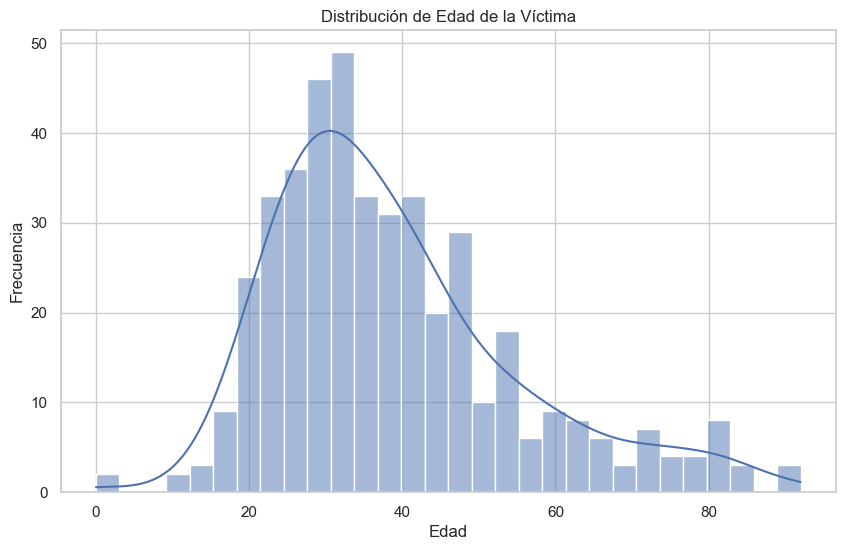

In [35]:
sns.set(style="whitegrid")

# Histograma de 'edad_victima'
plt.figure(figsize=(10, 6))
sns.histplot(df['edad_victima'], kde=True, bins=30)
plt.title('Distribución de Edad de la Víctima')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()


#### Analisis
Proporcionamos una vista rápida de la centralidad y la dispersión. La media y la mediana pueden darte una idea de la ubicación central, mientras que la desviación estándar te informa sobre la variabilidad. Los valores mínimo y máximo te indican el rango de edad de las víctimas.

Histograma: Ayuda a visualizar la distribución general de las edades. Por ejemplo, si la mayoría de las edades se agrupan en un rango específico o si hay una distribución uniforme a lo largo de varios rangos de edad. También puedes identificar la presencia de sesgos en la distribución.


##### Estadística descriptiva: Categórica

In [36]:
print("Frecuencia de Género de la Víctima:")
print(df['genero_m_f_victima'].value_counts())

print("\nFrecuencia de Estado Civil de la Víctima:")
print(df['estado_civil_victima'].value_counts())

print("\nFrecuencia de Escolaridad de la Víctima:")
print(df['escolaridad_victima'].value_counts())


Frecuencia de Género de la Víctima:
genero_m_f_victima
femenino     374
masculino     65
Name: count, dtype: int64

Frecuencia de Estado Civil de la Víctima:
estado_civil_victima
soltero(a)     248
unión libre     91
casado(a)       45
soltera         20
viudo(a)        14
separado(a)      5
union libre      5
casada           4
no aplica        3
no registro      2
divorciado       1
casado           1
Name: count, dtype: int64

Frecuencia de Escolaridad de la Víctima:
escolaridad_victima
bachiller completo        120
primaria incompleta        65
bachiller incompleto       55
técnico                    48
bachiller                  44
primaria completa          37
pregrado                   21
postgrado                  14
tecnólogo                  12
primaria                    4
bachillerato                2
profesional incompleto      2
sexto-bachiller             2
bachiller incomp'leto       2
quinto-bachillerato         2
ninguno                     1
septimo- bachiller       

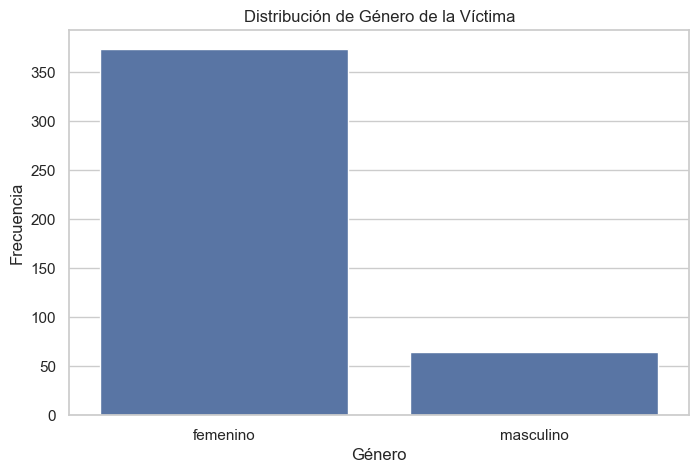

In [37]:
# Gráfico de barras para 'genero_m_f_victima'
plt.figure(figsize=(8, 5))
sns.countplot(x='genero_m_f_victima', data=df)
plt.title('Distribución de Género de la Víctima')
plt.xlabel('Género')
plt.ylabel('Frecuencia')
plt.show()

##### Estadística descriptiva: Relación entre variables

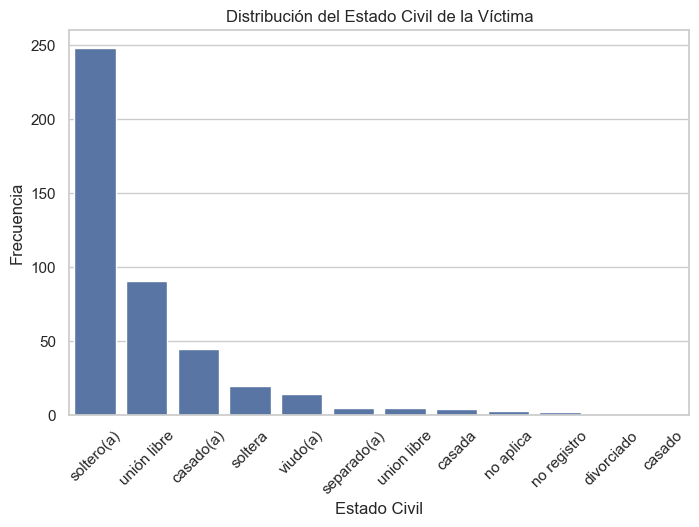

In [38]:
# Gráfico de barras para 'estado_civil_victima'
plt.figure(figsize=(8, 5))
sns.countplot(x='estado_civil_victima', data=df, order = df['estado_civil_victima'].value_counts().index)
plt.title('Distribución del Estado Civil de la Víctima')
plt.xlabel('Estado Civil')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.show()

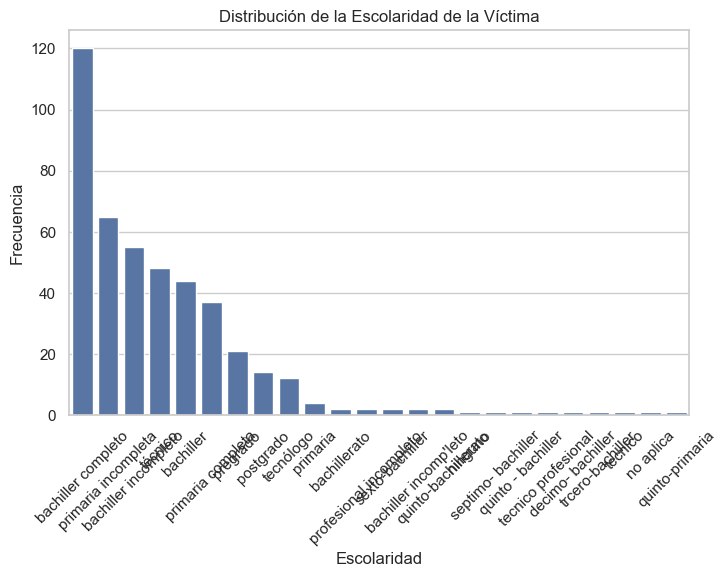

In [39]:
# Gráfico de barras para 'escolaridad_victima'
plt.figure(figsize=(8, 5))
sns.countplot(x='escolaridad_victima', data=df, order = df['escolaridad_victima'].value_counts().index)
plt.title('Distribución de la Escolaridad de la Víctima')
plt.xlabel('Escolaridad')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.show()

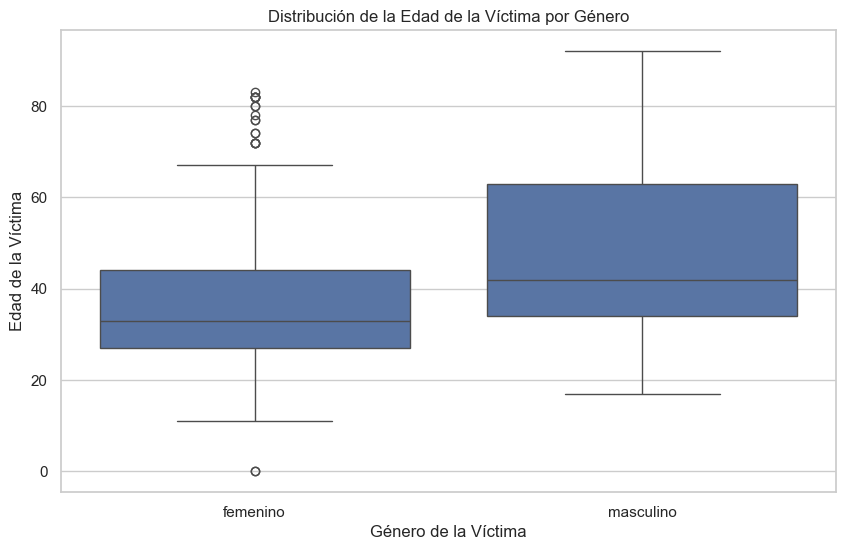

In [40]:
# Gráfico de caja de 'edad_victima' por 'genero_m_f_victima'
plt.figure(figsize=(10, 6))
sns.boxplot(x='genero_m_f_victima', y='edad_victima', data=df)
plt.title('Distribución de la Edad de la Víctima por Género')
plt.xlabel('Género de la Víctima')
plt.ylabel('Edad de la Víctima')
plt.show()

##### Estadística descriptiva: Clustering


In [41]:
features = df[['edad_victima', 'genero_m_f_victima', 'estado_civil_victima']].dropna()

In [42]:
# Codificación One-hot para variables categóricas
categorical_features = ['genero_m_f_victima', 'estado_civil_victima']
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", one_hot, categorical_features)], remainder='passthrough')
X_transformed = transformer.fit_transform(features)

In [43]:
X_dense = X_transformed.toarray()  # Convierte a matriz densa
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_dense)


In [44]:
from sklearn.preprocessing import MaxAbsScaler

scaler = MaxAbsScaler()
X_scaled = scaler.fit_transform(X_transformed)


In [45]:
# Decidir el número de clusters (k) es crítico, usaremos k=3 como ejemplo
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)

KMeans(n_clusters=3, random_state=42)

In [46]:
features['cluster'] = kmeans.labels_


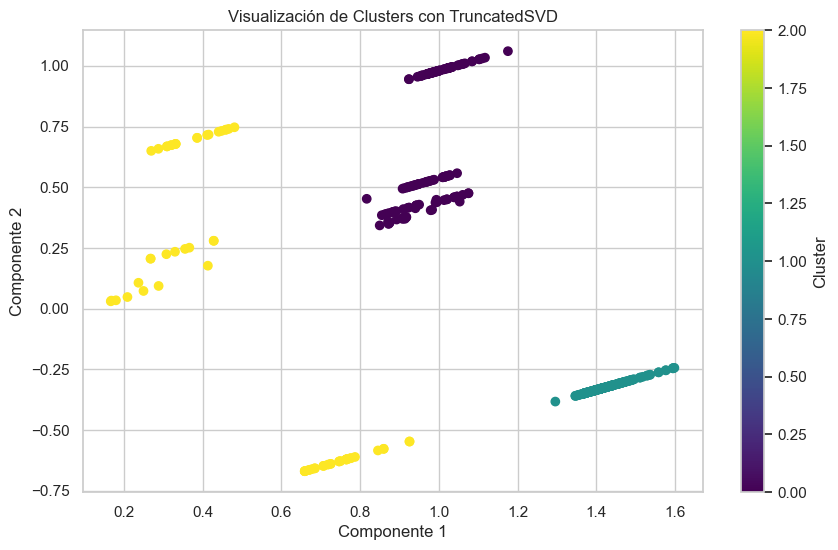

In [47]:
from sklearn.decomposition import TruncatedSVD

# Aplicación de TruncatedSVD
svd = TruncatedSVD(n_components=2, random_state=42)
X_svd = svd.fit_transform(X_scaled)

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(X_svd[:, 0], X_svd[:, 1], c=kmeans.labels_, cmap='viridis')
plt.title('Visualización de Clusters con TruncatedSVD')
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.colorbar(label='Cluster')
plt.show()


La gráfica que has generado muestra los resultados del clustering después de aplicar TruncatedSVD para la reducción de dimensionalidad a un conjunto de datos inicialmente multidimensional. Aquí tienes una interpretación de la visualización:

Ejes: El gráfico se ha reducido a dos dimensiones, donde el eje X representa el primer componente principal y el eje Y representa el segundo componente principal obtenidos a través de TruncatedSVD. Estos componentes son combinaciones lineales de tus variables originales y están diseñados para capturar la mayor cantidad de varianza (información) posible del dataset original.

Puntos: Cada punto en el gráfico representa una observación (o registro) de tu dataset. La posición de cada punto está determinada por los valores de los dos principales componentes de esa observación.

Colores: Los colores representan los diferentes clusters asignados por el algoritmo K-means. En este caso, parece que tienes tres clusters distintos (como se indica en la barra de color a la derecha), y cada cluster está coloreado de manera diferente.

Clusters Identificados: Observamos que los puntos están agrupados en distintas áreas del gráfico. Cada agrupación de puntos del mismo color representa un cluster. Por ejemplo, los puntos amarillos que están juntos forman un cluster, los cian otro, y los morados otro.

Relaciones y Separación: Parece que hay una separación clara entre algunos de los clusters, lo que indica que el algoritmo K-means ha encontrado patrones distintos en los datos que permiten agrupar las observaciones en estos grupos. Sin embargo, también hay un cluster (en color cian) que parece estar dividido en dos subgrupos pero aún se considera como uno solo por el algoritmo. Esto podría indicar una variabilidad dentro del cluster que podría explorarse más a fondo.


### Objetivos
Objetivo General: Comprender las tendencias y patrones subyacentes en los incidentes de violencia interfamiliar para informar la creación de programas de prevención y apoyo a las víctimas.

Objetivo Específico 1: Identificar los grupos demográficos más afectados por la violencia interfamiliar, basándose en características como edad, género y estado civil.

Objetivo Específico 2: Determinar las correlaciones entre los diferentes tipos de violencia (física, psicológica, económica, etc.) y los perfiles demográficos de las víctimas.

### Hallazgos Principales
Distribución de la Edad: La edad de las víctimas muestra una distribución con ciertos rangos de edad que presentan mayor frecuencia de casos. Las diferencias en la distribución de la edad según el género y el estado civil sugieren patrones específicos que merecen mayor investigación.

### Clustering: 
La aplicación de clustering reveló la existencia de grupos distintos dentro de los datos. Estos clusters podrían corresponder a diferentes perfiles de riesgo o tipos de violencia experimentados.

### Variables Categóricas:
La exploración de las variables categóricas mostró variaciones en la prevalencia de la violencia interfamiliar en función del género y estado civil. Estas diferencias podrían ser indicativas de factores de riesgo o de protección específicos.

#### Conclusiones y Recomendaciones
Perfiles de Riesgo: Los resultados del clustering y las diferencias demográficas sugieren que ciertos perfiles están más en riesgo de experimentar violencia interfamiliar. Estos perfiles podrían ser el enfoque de campañas de prevención dirigidas.

### Investigación Futura: 
Se recomienda una investigación más profunda para comprender las causas y consecuencias de la violencia interfamiliar dentro de los clusters identificados.

### Políticas Públicas y Programas: 
Los hallazgos pueden ser utilizados por los responsables de la formulación de políticas y programas para diseñar intervenciones más efectivas y proporcionar apoyo focalizado a las víctimas de violencia interfamiliar.

### Datos y Metodología: 
La inclusión de más variables numéricas y un análisis más detallado podrían enriquecer los hallazgos. Además, métodos más avanzados de reducción de dimensionalidad y clustering podrían proporcionar insights más profundos y modelos predictivos más robustos.